In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load data, 2 years
df1 = pd.read_csv("survey_results_public_2021.csv")
print(df1.shape)
df2 = pd.read_csv("survey_results_public_2022.csv")
print(df2.shape)

df = pd.concat([df1, df2], ignore_index=True)
print(f"{df.shape=}")
df.head(3)

(83439, 48)
(73268, 79)
df.shape=(156707, 85)


,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Select columns 
keep_col = ['ResponseId',

 'LanguageHaveWorkedWith',
 'ToolsTechHaveWorkedWith',
 'MiscTechHaveWorkedWith',
 'WebframeHaveWorkedWith',
 'PlatformHaveWorkedWith',
 'DatabaseHaveWorkedWith',
 'NEWCollabToolsHaveWorkedWith',
            
 #'NEWCollabToolsWantToWorkWith',
 #'DatabaseWantToWorkWith',
 #'WebframeWantToWorkWith',
 #'ToolsTechWantToWorkWith',
 #'PlatformWantToWorkWith',
 #'MiscTechWantToWorkWith',
 #'LanguageWantToWorkWith',
 
 'Age',
 'Accessibility',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'MentalHealth',

 'MainBranch',
 #'DevType',
 'YearsCode',
 'YearsCodePro',

 'Currency',
 'Country',
 'ConvertedCompYearly',
 #'CompTotal',
 #'CompFreq',
 #'Sexuality',
 #'OrgSize'
]


In [ ]:
set(df['MainBranch']) # => Useless if 2 values "dev/notdev but code"

In [24]:
# Clean data : drop columns, NaNs, Concat (& drop) HaveWorkedWith

df = df[keep_col]

cols = [col for col in df.columns if col.endswith("HaveWorkedWith")]
df['HaveWorkedWith'] = df[cols].apply(lambda row: ';'.join(row.values.astype(str)), axis=1)
df = df.drop(columns= cols)
print(df.shape)
df = df.dropna()
print(df.shape)


(156707, 15)
(78448, 15)


In [28]:
# Clean data : Reduce distincs responses

def clean_gender(string):
    if string.split(';')[0] == 'Man':
        return 'Man'
    elif 'Woman' in string:
        return 'Woman'
    else:
        return 'Blank'
    
def clean_accessibility(string):
    if 'None of the above' in string:
        return 'No'
    elif 'Prefer not to say' in string:
        return 'No'
    else:
        return 'Yes'
    
def clean_mentalhealth(string):
    if 'None of the above' in string:
        return 'No'
    elif 'Prefer not to say' in string:
        return 'No'
    else:
        return 'Yes'
    
def clean_edlevel(string):
    """
     {'Associate degree (A.A., A.S., etc.)',
     'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
     'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
     'Other doctoral degree (Ph.D., Ed.D., etc.)',
     'Primary/elementary school',
     'Professional degree (JD, MD, etc.)',
     'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
     'Some college/university study without earning a degree',
     'Something else'}
     """
    return 'TODO'

def clean_employ(string):
    return 'TODO'

def clean_ethnicity(string):
    'on prend ?'
    return 'TODO'

df['Gender'] = df['Gender'].apply(lambda x: clean_gender(x))
df['Accessibility'] = df['Accessibility'].apply(lambda x: clean_accessibility(x))
df['MentalHealth'] = df['MentalHealth'].apply(lambda x: clean_mentalhealth(x))
#df['EdLevel'] = df['EdLevel'].apply(lambda x: clean_edlevel(x))
#df['Employment'] = df['Employment'].apply(lambda x: clean_employ(x))
#df['Ethnicity'] = df['Ethnicity'].apply(lambda x: clean_ethnicity(x))


Man -- Man
Man; Non-binary -- Man


In [36]:
#print(df.columns)
#set(df['Employment'])

Index(['ResponseId', 'Age', 'Accessibility', 'EdLevel', 'Employment',
       'Ethnicity', 'Gender', 'MentalHealth', 'MainBranch', 'YearsCode',
       'YearsCodePro', 'Currency', 'Country', 'ConvertedCompYearly',
       'HaveWorkedWith'],
      dtype='object')


{'Employed full-time',
 'Employed part-time',
 'Employed, full-time',
 'Employed, full-time;Employed, part-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired',
 'Employed, full-time;Retired',
 'Employed, part-time',
 'Employed, part-time;Retired',
 'I prefer not to say',
 'Independent contractor, freelancer, or self-employed',
 'Independent contractor, freelancer, or self-employed;Employed, part-time',
 'Independent contractor, freelancer, or self-employed;Retired',
 'Retired'}

In [ ]:
# WIP -- Here

In [5]:
# compute HaveWorkedWith skills for which men >> women

have_worked_with_columns = [col for col in df.columns if col.endswith("HaveWorkedWith")]

dfs = [{"value": value, **df.loc[df["Gender"]==value, column].str.get_dummies(";").sum().div((df["Gender"]==value).sum())}
       for column in have_worked_with_columns
       for value in ["Man", "Woman"]]

var = pd.DataFrame(dfs).set_index("value").stack()

s3 = (var["Man"] - var["Woman"])
should_have_worked_with_gender = set((s3[s3>0.01]).index)

In [6]:
should_have_worked_with_gender

{'.NET',
 '.NET Core / .NET 5',
 '.NET Framework',
 'ASP.NET Core ',
 'AWS',
 'Android Studio',
 'Angular',
 'Ansible',
 'Apache Kafka',
 'Bash/Shell',
 'C',
 'C#',
 'C++',
 'Cloud Firestore',
 'Dart',
 'Delphi',
 'DigitalOcean',
 'Django',
 'Docker',
 'DynamoDB',
 'Elasticsearch',
 'Electron',
 'Emacs',
 'Express',
 'Firebase',
 'Flask',
 'Flutter',
 'Git',
 'Go',
 'Google Cloud Platform',
 'Heroku',
 'IntelliJ',
 'Java',
 'JavaScript',
 'Kotlin',
 'Kubernetes',
 'Laravel',
 'MariaDB',
 'Microsoft Azure',
 'Microsoft SQL Server',
 'Microsoft Teams',
 'MongoDB',
 'Nano',
 'Neovim',
 'Next.js',
 'Node.js',
 'PHP',
 'PostgreSQL',
 'PowerShell',
 'Python',
 'Qt',
 'React.js',
 'Redis',
 'Rider',
 'Rust',
 'SQL',
 'SQLite',
 'Svelte',
 'Terraform',
 'TypeScript',
 'Unity 3D',
 'Vim',
 'Visual Studio',
 'Visual Studio Code',
 'Vue.js',
 'Webstorm',
 'Yarn',
 'npm'}

In [6]:
# compute WantToWorkWith skills for which men >> women

want_to_work_with_columns = [col for col in df.columns if col.endswith("WantToWorkWith")]

dfs = [{"value": value, **df.loc[df["Gender"]==value, column].str.get_dummies(";").sum().div((df["Gender"]==value).sum())}
       for column in have_worked_with_columns
       for value in ["Man", "Woman"]]

var = pd.DataFrame(dfs).set_index("value").stack()

s4 = var["Man"] - var["Woman"]
should_want_to_worked_with_gender = set((s4[s4>0.01]).index)

In [7]:
# compute HaveWorkedWith skills for which yound >> old

dfs = [{"value": value, **df.loc[df["Age"]==value, column].str.get_dummies(";").sum().div((df["Age"]==value).sum())}
       for column in have_worked_with_columns
       for value in ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old']]

var = pd.DataFrame(dfs).set_index("value").stack()

s5 = var["18-24 years old"] + var["25-34 years old"] - var["45-54 years old"] - var["55-64 years old"]
should_have_worked_with_age = set((s5[s5>0.01]).index)

In [8]:
# compute WantToWorkWith skills for which yound >> old

dfs = [{"value": value, **df.loc[df["Age"]==value, column].str.get_dummies(";").sum().div((df["Age"]==value).sum())}
       for column in want_to_work_with_columns
       for value in ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old']]

var = pd.DataFrame(dfs).set_index("value").stack()

s6 = var["18-24 years old"] + var["25-34 years old"] - var["45-54 years old"] - var["55-64 years old"]
should_want_to_worked_with_age = set((s6[s6>0.01]).index)

In [9]:
# skills where men >> women and yound >> old

skills = sorted(list(should_have_worked_with_gender.intersection(should_want_to_worked_with_gender).intersection(should_have_worked_with_age).intersection(should_want_to_worked_with_age)))
print(*skills, sep=", ")

Android Studio, Angular, C, C++, Cloud Firestore, Dart, DigitalOcean, Django, Docker, DynamoDB, Elasticsearch, Electron, Express, Firebase, Flask, Flutter, Git, Go, Google Cloud Platform, Heroku, IntelliJ, Java, JavaScript, Kotlin, Kubernetes, Laravel, MongoDB, Nano, Neovim, Next.js, Node.js, PostgreSQL, Python, React.js, Redis, Rider, Rust, Svelte, TypeScript, Unity 3D, Vim, Visual Studio Code, Vue.js, Webstorm, Yarn, npm


In [10]:
print(len(skills))

46


In [11]:
# select man/woman only and 18-64 yo only

df1 = df.loc[df["Gender"].isin(["Man", "Woman"]) &
             df["Age"].isin(['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old'])].copy()
df1.shape

(136566, 85)

In [12]:
df1["Gender"].value_counts()

Man      129460
Woman      7106
Name: Gender, dtype: int64

In [13]:
df1["Age"].value_counts()

25-34 years old    58474
18-24 years old    36026
35-44 years old    28058
45-54 years old    10354
55-64 years old     3654
Name: Age, dtype: int64

In [14]:
# compute Skills value by people for selected skills
# 2 by HaveWorkedWith skill
# +
# 1 by WantToWorkWith skill

var = pd.concat([df1[column].str.get_dummies(";") for column in have_worked_with_columns], axis=1)[skills]*2 +\
      pd.concat([df1[column].str.get_dummies(";") for column in want_to_work_with_columns], axis=1)[skills]

df1["Skills"] = var.sum(axis=1)

In [15]:
df1["Skills"].describe()

count    136566.000000
mean         26.118280
std          14.639093
min           0.000000
25%          15.000000
50%          24.000000
75%          35.000000
max         132.000000
Name: Skills, dtype: float64

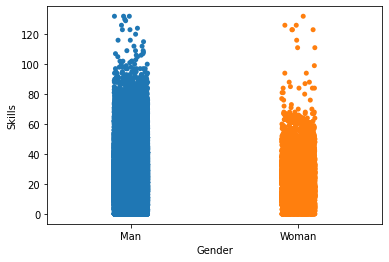

In [16]:
# men vs women Skills

sns.stripplot(data=df1, x="Gender", y="Skills");

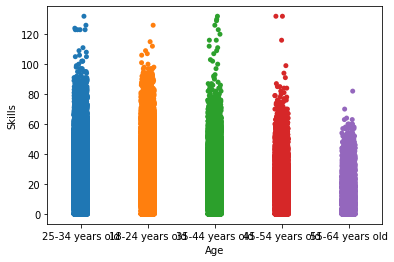

In [17]:
# young vs old Skills

sns.stripplot(data=df1, x="Age", y="Skills");

In [18]:
pd.crosstab(df1["Age"], df1["Gender"])

Gender,Man,Woman
Age,,
18-24 years old,33992,2034
25-34 years old,55036,3438
35-44 years old,26938,1120
45-54 years old,10009,345
55-64 years old,3485,169


In [19]:
(df1.pivot_table(index="Age",
                 columns="Gender",
                 values="Skills")
 .round(1)
)

Gender,Man,Woman
Age,,
18-24 years old,29.5,23.6
25-34 years old,27.2,22.3
35-44 years old,24.4,19.9
45-54 years old,20.0,18.3
55-64 years old,15.3,12.5


In [20]:
df1["YearsCode"].unique()

array([nan, '7', '17', '4', '6', '16', '12', '15', '40', '9', '26', '14',
       '39', '20', '8', '19', '5', '3', 'Less than 1 year', '10', '22',
       '2', '1', '34', '21', '13', '25', '24', '30', '31', '18', '38',
       '27', '41', '42', '35', '23', '28', '11', '37', '44', '43', '36',
       '33', '45', '29', '46', '32', '47', '50', '49', '48',
       'More than 50 years'], dtype=object)

In [21]:
df1["YearsCodePro"].unique()

array([nan, '10', '4', '5', '6', '2', '30', '9', '18', '21', '1', '16',
       'Less than 1 year', '15', '3', '7', '12', '8', '17', '14', '26',
       '25', '20', '34', '11', '24', '22', '13', '31', '23', '41', '27',
       '28', '19', '35', '33', '37', '29', '32', '43', '40', '38', '42',
       '45', '36', '44', 'More than 50 years', '47', '39', '46', '48',
       '50', '49'], dtype=object)

In [22]:
# try to compute a Score value from Skills and YearsCode
# Score ceiled to 50
# Years ceiled to 50
# Score = Skills + log(YearsCodePro or YearsCode/2)

df1["YearsCode"] = df1["YearsCode"].mask(df1["YearsCode"]=="Less than 1 year", 0)
df1["YearsCode"] = df1["YearsCode"].mask(df1["YearsCode"]=="More than 50 years", 50)
df1["YearsCode"] = df1["YearsCode"].fillna(0).astype(int)
df1["YearsCodePro"] = df1["YearsCodePro"].mask(df1["YearsCodePro"]=="Less than 1 year", 0)
df1["YearsCodePro"] = df1["YearsCodePro"].mask(df1["YearsCodePro"]=="More than 50 years", 50)
df1["Score"] = df1["Skills"].clip(None, 65) + np.log(1. + df1["YearsCodePro"].astype(float).fillna(df1["YearsCode"].div(2)))
df1["Score"].describe()

count    136566.000000
mean         27.839013
std          14.224833
min           0.000000
25%          17.197225
50%          26.386294
75%          36.791759
max          68.931826
Name: Score, dtype: float64

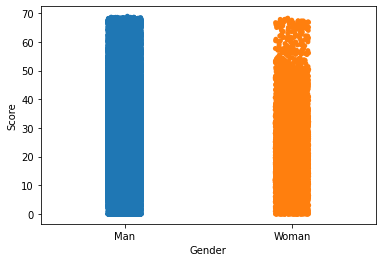

In [23]:
sns.stripplot(data=df1, x="Gender", y="Score");

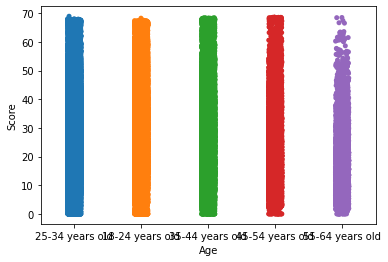

In [24]:
sns.stripplot(data=df1, x="Age", y="Score");

In [25]:
# as we have ~130K men and 7K women
# select a subset of men (n x women) stratified by Gender and Age using train_test_split

n = 2  # twice as men

from sklearn.model_selection import train_test_split

_, df2 = train_test_split(df1.loc[df1["Gender"]=="Man"],
                          test_size=7106*n,
                          stratify=df1.loc[df1["Gender"]=="Man", "Age"],
                          random_state=0)

df2 = (pd
       .concat([df2, df1.loc[df1["Gender"]=="Woman"]])
       .sort_values(by="Score", ascending=False)
       .reset_index(drop=True)
      )

In [26]:
df2["Gender"].value_counts()

Man      14212
Woman     7106
Name: Gender, dtype: int64

In [27]:
df2.pivot_table(index="Age",
                columns="Gender",
                values="Score"
               ).round(1)

Gender,Man,Woman
Age,,
18-24 years old,30.5,24.4
25-34 years old,28.8,23.8
35-44 years old,26.7,21.7
45-54 years old,23.0,20.3
55-64 years old,18.2,15.3


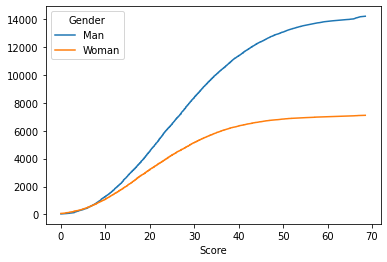

In [28]:
(df2.pivot_table(index="Score",
                 columns="Gender",
                 values="ResponseId",
                 aggfunc="count",
                 fill_value=0)
 .cumsum()
 .plot
 .line()
);

In [29]:
# simple selection algorithm: compute Score and take the m best
m = 500

In [30]:
# disparity of men vs women 
df2.loc[:m, "Gender"].value_counts()

Man      391
Woman    110
Name: Gender, dtype: int64

In [31]:
# disparity of yound vs old 
df2.loc[:m, "Age"].value_counts().sort_index()

18-24 years old    200
25-34 years old    194
35-44 years old     78
45-54 years old     26
55-64 years old      3
Name: Age, dtype: int64

In [32]:
# todo
# apply other ML without Gender and Age
# compute fairness KPI